# Table of Contents

* [Honors Physics PHYS1010 - The Mathematics of Life](#Honors-Physics-PHYS1010---The-Mathematics-of-Life)
   * [Introduction](#Introduction)
      * [Benoit Mandelbrot](#Benoit-Mandelbrot)
* [Fractals in Python](#Fractals-in-Python)
   * [Setup the Environment](#1.-Setup-the-Environment)
   * [Generating the Mandelbrot Set](#2.-Generating-the-Mandelbrot-Set)
   * [Generating a Fractal Image](#3.-Generate-a-Fractal-Image)
   * [The Julia Set](#4.-The-Julia-Set)
* [Modeling Biological Organisms](#Modeling-Biological-Organisms)
* [Conclusions](#Conclusions)

# Honors Physics PHYS1010 - The Mathematics of Life

## Introduction

The laws of nature are remarkably simple. In their most compact form, they can be written down on the front of a tee shirt, or on the side of a coffee cup. Yet the universe is complex. Consider the images from our own planet below.

![Coastlines and Rivers](coastlines_rivers.jpg)

![Romanesco Broccoli](romanesco_broccoli.jpg)

The top image of rivers and coastlines are not associated with organisms; they can happen whether living creatures are around or not, simply due to water and time and erosion. The bottom image of romanesco broccoli is a picture of a living organism with biochemistry. Yet they share something in common: a mathematical property known as "self-similarity". This means that "the parts are similar to the whole," and if you zoom in closely on a part it will geometrically resemble the whole of which it is part. 

### Benoit Mandelbrot

It was the mathematician Benoit Mandelbrot who first shed serious and rigorous light on this observed feature of the natural world. Mandelbrot was interested not in the classical geometric shapes - circles, squares, triangles - but in the real shapes found in nature, which are never idealistic but exhibit beauty nonetheless.

He coined the term “fractal” to describe geometric shapes that appear the same no matter how closely you zoom into them. This he did after working with sets of complex numbers, originally the “Julia Set” but later developing his own set (“The Mandelbrot Set”). We will play with those below.

Fractals describe “self-similarity” in nature. Self-similarity is everywhere. Consider the image of a tree and its branches below:

![Branching tree](branching_tree.jpg)

Does this resemble anything else you might have seen in nature? How about the rivers and forks above? How about the human lung's arterial system below? 

![Lung arterial network](lung_arterial_network.jpeg)


Self-similarity is everywhere, whether geological forces or biochemical forces are at work. Self-similarity is found on Mars and Europa. It may be a uniting organizational feature of natural systems, as it seems to be a simple consequence of a singular mathematical concept: a system with inputs whose output is fed back into the system.


# Fractals in Python

Here we will demonstrate how to generate fractal images using the coding language python

## 1. Setup the Environment

Here we import the packages we need from the existing python libraries. Python has extensive libraries of functions that saves us from having to write them ourselves.

In [21]:
#The Python Imaging Library (PIL)
from PIL import Image, ImageDraw

# Basic math and color tools
import math, colorsys, numpy

# Mathematical plotting
from matplotlib import colors as mplcolors
import matplotlib.pyplot as plt

# Displaying real graphical images (pictures)
from IPython.display import Image as ipythonImage

import pickle,glob

# Graphical representation library PANDAS
import pandas as pd

# Imports a lot of matplotlib code to run inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This sets up the colors we want in our fractal image.

How this works:
We are building an array of values that correspond to our colors. Colors are defined in Python as a list of three values corresponding to the percentage of Red, Green, and Blue in that color.
Black is (0.0, 0.0, 0.0) and White is (1.0, 1.0, 1.0)

Feel free to change the colors as you wish. The list of prenamed colors is porvided below. Later we will see another way to generate the colors using math.

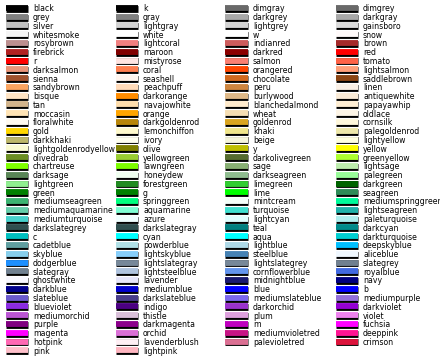

In [17]:
ipythonImage(filename = "named_colors.png")

In [18]:
# Make a list of colors. We can look up a color by index. In other words:
# [0] -> black (the first color in the list)
# [1] -> darkslategray (the second color in the list)
# etc.

color_list=('black',
            'darkslategray',
            'darkgreen',
            'green',
            'forestgreen',
            'darkseagreen',
            'limegreen',
            'lime',
            'palegreen',
            'white')

In [24]:
palette = []
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[0]]) )
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[1]]) )
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[2]]) )
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[3]]) )
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[4]]) )
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[5]]) )
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[6]]) )
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[7]]) )
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[8]]) )
palette.append( mplcolors.hex2color(mplcolors.cnames[color_list[9]]) )

## 2. Generating the [Mandelbrot Set](https://en.wikipedia.org/wiki/Mandelbrot_set)

As we covered in the slides, The Mandelbrot Set is the set of complex numbers, C, such that the following equation does not diverge when iterated from $z = 0$:

\begin{split}
z_{n+1}= z_{n}^{2} + c
\end{split}




To determine if the equation is diverging, we need to set up a test.

To do so, we will use a loop and check if the absolute value of $z_{n}$ is larger than a cutoff.

We define a function to do this that accepts an input value for $c$ and returns $-1$ if $c$ is in the Mandelbrot Set and the iteration that diverged if not.


In [25]:
cutoff = 2.0
def iterate_series(c):
    z_n = complex(0,0)
    for n in range(0,100):
        z_n = z_n*z_n + c
        if abs(z_n) > cutoff:
            return n
    return -1

Let's test our function

In [26]:
iterate_series(1)

2

In [27]:
iterate_series(0)

-1

In [28]:
iterate_series(-1)

-1

## 3. Generate a Fractal Image

Now that we can determine if a value is in the Mandelbrot Set, let's build the structure of our image.

In [29]:
# Define the physical maximal width and height of the image we will make
x_max = 800
y_max = 800

In [30]:
img = Image.new("RGB",(x_max,y_max))
d = ImageDraw.Draw(img)

We are going to loop over all the pixels in our image and check if that pixel is in the Mandelbrot Set.  We are using the $x$ and $y$ coordinates to represent the Real and Imaginary parts of the Complex number $z$.

In [31]:
for x in range(x_max):
    for y in range(y_max):
        #This determines the centering of our image
        offset=(2.2,1.5)
        #The value of c is determined by scaling the pixel location and offsetting it.
        c = complex(x*3.0/x_max-offset[0], y*3.0/y_max-offset[1])
        #Now we call our function from before
        n = iterate_series(c)
        
        #Checks if c is in the Mandelbrot Set            
        if n == -1: 
            v=1
        #If not, it checks when it diverged    
        else: 
            v=n/100.0
        
        #Determines the colors in our image based on our the previous check
        color_index = int(v * (len(palette)-1))
        rgb = palette[color_index]
        red = int(rgb[0]*255)
        green = int(rgb[1]*255)
        blue = int(rgb[2]*255)

        d.point((x,y),fill = (red,green,blue))


Now we save our image and display it.

In [32]:
img.save("fractal.png")

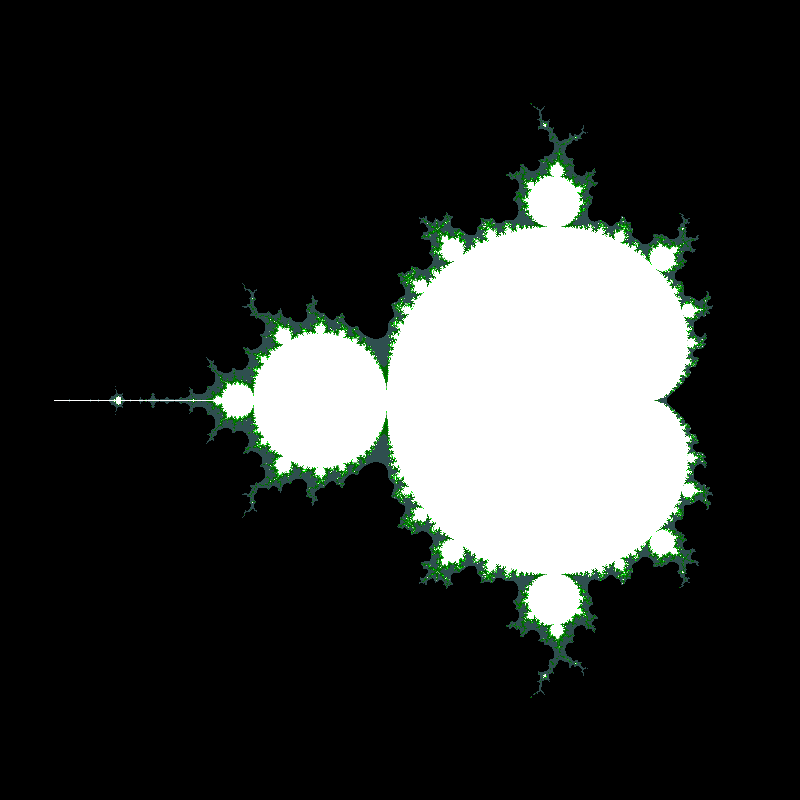

In [33]:
ipythonImage(filename='fractal.png')

These fractal images resemble lakes with bays and rivers and forks and streams. If you could zoom in on one of the bays, you would see that it, close up, looks just like the above image. And so on. And so on. Self-similarity. See the animation below.

This idea is used to generate realistic looking mountain ranges, coastlines, and bodies of water in computer animated graphics in video games and movies. It is considered so effective at mimicking the real world because fractal geometry seems to be the mathematics that explains "natural shapes" found in the real world.

![Zooming on a Mandelbrot Set Fractal Image](fractal_zoom.gif)

## 4. The [Julia Set](https://en.wikipedia.org/wiki/Julia_set)

It turns out that there are more ways to make a fractal. We are going to open up some of the parameters and see what happens.

First we open up our value of $z_n$ and redefine our iteration function.

We have also pulled out the functional form that defines our set, this will make it easier to modify this without breaking anything in our iterate function.

In [34]:
def func_z_n(c, z_n):
    #return z_n*z_n +c
    return numpy.power(z_n,2) + c

In [35]:
cutoff = 2
def iterate_series2(c, z_n = -2.0**.5):
    for n in range(0,100):
        z_n = func_z_n(c, z_n)
        if abs(z_n) > cutoff:
            return n
    return -1

Now we open up the value of c to be defined by us and let the pixel location relate to the value of $z_{n}$

In [36]:
c_julia = complex(-0.4, 0.6)

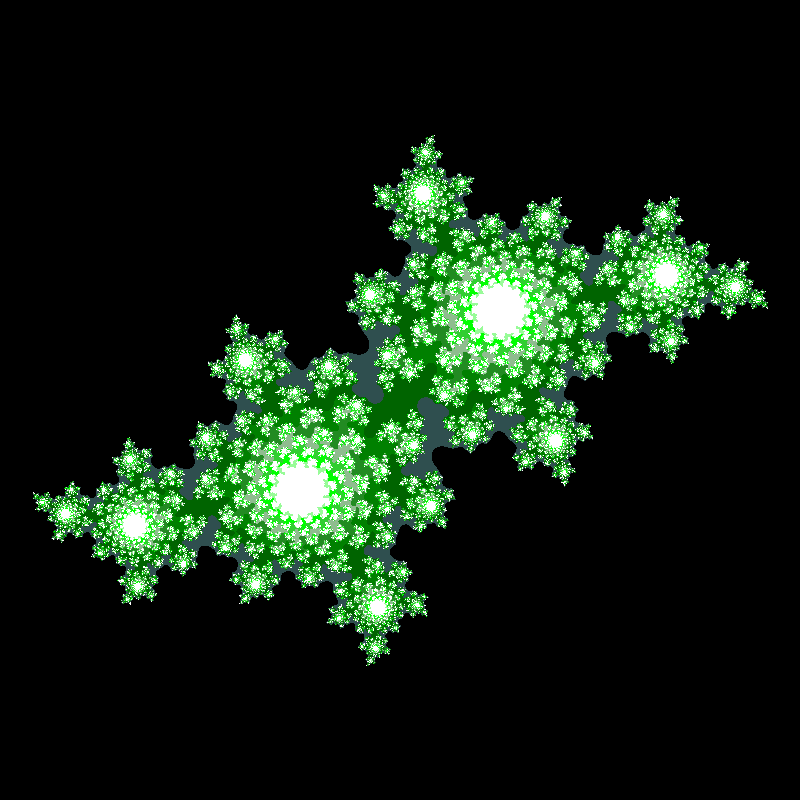

In [45]:
# This is the work-horse code for the Julia Set computation. Rerun this cell if you want to regenerate your image.
if x_max > 800:
    x_max = 800
if y_max > 800:
    y_max = 800
    

for x in range(x_max):
    for y in range(y_max):
        offset=(1.5, 1.5)
        z = complex(x*3.0/x_max-offset[0], y*3.0/y_max-offset[1])
        n = iterate_series2(c_julia, z)
        
            
        if n == -1:
            v=1
        else:
            v=n/100.0
        
        color_index = int(v * (len(palette)-1))
        rgb = palette[color_index]
        red = int(rgb[0]*255)
        green = int(rgb[1]*255)
        blue = int(rgb[2]*255)

        d.point((x,y),fill = (red,green,blue))
        
        #If you want to play with the colors another way, uncomment this and run the color pallet cell bellow.
        #Don't forget to comment out the line above first
        
        #d.point((x, y), fill = palette[int(v * (colors_max-1))])

        pass
    pass

# By changing the name here, you can save multiple files without having to modify too much code
name = "julia.png"
img.save(name)
ipythonImage(filename = name)

### Useful numpy Functions: Call by using numpy.function

Try some of these in the definition of our set and see what happens.

|Trig Functions|Hyperbolic Functions|Exponentials and Logs|
|:---:|:---:|:---:|
|`sin(x)`|`sinh(x)`|`exp(x)`|
|`cos(x)`|`cosh(x)`|`log(x)`|
|`tan(x)`|`tanh(x)`|`log10(x)`|
|`arcsin(x)`|`arcsinh(x)`|`power(x,y)`|
|`arccos(x)`|`arccosh(x)`|`sqrt(x)`|
|`arctan(x)`|`arctanh(x)`||


# Modeling Biological Organisms

Below, we will create what is known as the "Barnsley Fern". It is so called because this bit of mathematics can create forms similar to this:

![Fern fronds](fern.jpg)

In [49]:
def makeFern(f,itt):            
    colname = ["percent","a","b","c","d","e","f"]
    print(pd.DataFrame(data=numpy.array(f), columns = colname))
    
    if itt > 5000:
        itt = 5000
    
    x,y = {0.5,0.0}
    xypts=[]
    if abs(sum(f[j][0] for j in range(len(f)))-1.0) < 10^-10:
        print("Probabilities must sum to 1")
        return
    for i in range(itt):
        rand = (numpy.random.random())
        cond = 0.0
        for j in range(len(f)):
            if  (cond <= rand) and (rand <= (cond+f[j][0])):
                x = f[j][1]*x+f[j][2]*y+f[j][5]
                y = f[j][3]*x+f[j][4]*y+f[j][6]
                xypts.append((x,y))
            cond = cond + f[j][0]
            
    xmax,ymax = max(abs(transpose(xypts)[0])),max(abs(transpose(xypts)[1]))
    plt.axes().set_aspect('equal')
    color = transpose([[abs(r)/xmax for r in transpose(xypts)[0]],[abs(g)/ymax for g in transpose(xypts)[1]],[b/itt for b in range(itt)]])
    
    plt.scatter(transpose(xypts)[0],transpose(xypts)[1],alpha=0.5, facecolors=color, edgecolors='none', s=1)
    

#### For Barnsley's Fern:
Use the following values

|Percent|A|B|C|D|E|F|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0.01|0.0|0.0|0.0|0.16|0.0|0.0|
|0.85|0.85|0.04|-0.04|0.85|0.0|1.60|
|0.07|0.20|-0.26|0.23|0.22|0.0|1.60|
|0.07|-0.15|0.28|0.26|0.24|0.0|0.44|

Of course, this is only one solution so try as changing the values. Some values modify the curl, some change the thickness, others completely rearrange the structure. Because this is a chaotic system, tiny changes to any of these can have radical outcomes on the organic structure you create. Try it below!

   percent     a     b     c     d    e     f
0     0.01  0.00  0.00  0.00  0.16  0.0  0.00
1     0.85  0.85  0.08 -0.08  0.85  0.0  1.60
2     0.07  0.20 -0.26  0.23  0.22  0.0  1.60
3     0.07 -0.15  0.28  0.26  0.24  0.0  0.44


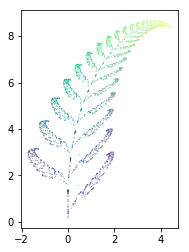

In [62]:
f = ((0.01,0.0,0.0,0.0,0.16,0.0,0.0),
     (0.85,0.85,0.08,-0.08,0.85,0.0,1.60),
     (0.07,0.20,-0.26,0.23,0.22,0.0,1.60),
     (0.07,-0.15,0.28,0.26,0.24,0.0,0.44))

makeFern(f,5000)

# Conclusions

This is a small taste of fractal geometry, with some exposure to the software you could write (or copy and modify) to play with these ideas. Can fractal geometry help us to understand the possibilities that can exist on worlds we have never visited? What other things could you explore that are also governed by fractal geometry and the mathematics of "deterministic chaos" that overaches all of this?

We invite you to explore this further in concepts like weather and climate change, the structure of biological organisms, and natural and mechanics structures.

* Gleick, James. "Chaos". Penguin Books. 20th Anniversary ed. edition (August 26, 2008). ISBN-10: 0143113453. ISBN-13: 978-0143113454
* Al-Khalili, Jim. "The Secret Life of Chaos". Directed by Nic Stacey. Aired on BBC4. Available from Amazon Streaming/CuriosityStream.